In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import time

path = '/content/drive/MyDrive/CSV/dataset naive_bayes/dataset_nb1_motor.csv'
df = pd.read_csv(path)

df.describe()

,No,Usia,Penghasilan
count,20.00000,20.000000,20.000000
mean,10.50000,32.050000,274.150000
std,5.91608,8.293783,74.533126
min,1.00000,20.000000,169.000000
25%,5.75000,26.000000,233.750000
50%,10.50000,30.500000,250.000000
75%,15.25000,35.500000,313.500000
max,20.00000,50.000000,422.000000


In [ ]:
df

,No,Nama_Konsumen,Kecamatan,Desa,Pendidikan,Profesi,Usia,Penghasilan,Jenis_Kelamin,Pembelian
0,1,Ani,Karangpawitan,Mangunreja,SMA,Karyawan,25,178,Perempuan,Cash
1,2,Andi,Garut Kota,Sukaregang,SMA,Buruh,40,190,Laki-Laki,Kredit
2,3,Ucup,Tarogong,Rancabango,S1,Guru,34,244,Laki-Laki,Kredit
3,4,Yusuf,Bayongbong,Cisalak,S1,Pekerja,31,310,Laki-Laki,Cash
4,5,Elis,Cikajang,Sasak,SMA,Buruh,44,240,Perempuan,Cash
5,6,Ika,Cisurupan,Sariayu,SMA,Karyawan,31,260,Perempuan,Cash
6,7,Bambang,Karangpawitan,Citimun,D3,Pekerja,29,290,Laki-Laki,Kredit
7,8,Mila,Wanaraja,Nangkokod,D3,Buruh,26,311,Perempuan,Kredit
8,9,Sari,Wanaraja,Nangkokod,S1,Guru,30,323,Perempuan,Kredit
9,10,Tari,Garut Kota,Sukaregang,SMA,Pekerja,26,242,Perempuan,Cash


In [ ]:
df.shape

(20, 10)

In [ ]:
df.isnull().sum()

No               0
Nama_Konsumen    0
Kecamatan        0
Desa             0
Pendidikan       0
Profesi          0
Usia             0
Penghasilan      0
Jenis_Kelamin    0
Pembelian        0
dtype: int64

In [ ]:
df.head()

,No,Nama_Konsumen,Kecamatan,Desa,Pendidikan,Profesi,Usia,Penghasilan,Jenis_Kelamin,Pembelian
0,1,Ani,Karangpawitan,Mangunreja,SMA,Karyawan,25,178,Perempuan,Cash
1,2,Andi,Garut Kota,Sukaregang,SMA,Buruh,40,190,Laki-Laki,Kredit
2,3,Ucup,Tarogong,Rancabango,S1,Guru,34,244,Laki-Laki,Kredit
3,4,Yusuf,Bayongbong,Cisalak,S1,Pekerja,31,310,Laki-Laki,Cash
4,5,Elis,Cikajang,Sasak,SMA,Buruh,44,240,Perempuan,Cash


In [ ]:
#visualisasi data 

In [ ]:
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
vis = px.bar(df['Nama_Konsumen'].value_counts(), #melihat data berdasarkan nama konsumen
             title = "Data Konsumen")
vis.show()

In [ ]:
vis = px.bar(df['Kecamatan'].value_counts(), #melihat data berdasarkan data kecamatan
             title = "Data Kecamatan")
vis.show()

In [ ]:
vis = px.bar(df['Pembelian'].value_counts(),
             title = "data pembelian")
vis.show()

In [ ]:
vis = px.bar(df['Profesi'].value_counts(),
             title = "data profesi")
vis.show()

In [ ]:
df.info() #melihat informasi tipe data dan isi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No             20 non-null     int64 
 1   Nama_Konsumen  20 non-null     object
 2   Kecamatan      20 non-null     object
 3   Desa           20 non-null     object
 4   Pendidikan     20 non-null     object
 5   Profesi        20 non-null     object
 6   Usia           20 non-null     int64 
 7   Penghasilan    20 non-null     int64 
 8   Jenis_Kelamin  20 non-null     object
 9   Pembelian      20 non-null     object
dtypes: int64(3), object(7)
memory usage: 1.7+ KB


In [ ]:
def drop_data():
  print ("Proses pelepasan data yang tidak dibutuhkan oleh sistem")
  global df
  df = df.drop(columns=['No','Desa','Pendidikan','Usia'])
  time.sleep(10)
  print("Proses Drop Data Berhasil")
  time.sleep(5)
  print("Proses Selesai")

In [ ]:
drop_data()

Proses pelepasan data yang tidak dibutuhkan oleh sistem
Proses Drop Data Berhasil
Proses Selesai


In [ ]:
df

,Nama_Konsumen,Kecamatan,Profesi,Penghasilan,Jenis_Kelamin,Pembelian
0,Ani,Karangpawitan,Karyawan,178,Perempuan,Cash
1,Andi,Garut Kota,Buruh,190,Laki-Laki,Kredit
2,Ucup,Tarogong,Guru,244,Laki-Laki,Kredit
3,Yusuf,Bayongbong,Pekerja,310,Laki-Laki,Cash
4,Elis,Cikajang,Buruh,240,Perempuan,Cash
5,Ika,Cisurupan,Karyawan,260,Perempuan,Cash
6,Bambang,Karangpawitan,Pekerja,290,Laki-Laki,Kredit
7,Mila,Wanaraja,Buruh,311,Perempuan,Kredit
8,Sari,Wanaraja,Guru,323,Perempuan,Kredit
9,Tari,Garut Kota,Pekerja,242,Perempuan,Cash


In [ ]:
df.head()

,Nama_Konsumen,Kecamatan,Profesi,Penghasilan,Jenis_Kelamin,Pembelian
0,Ani,Karangpawitan,Karyawan,178,Perempuan,Cash
1,Andi,Garut Kota,Buruh,190,Laki-Laki,Kredit
2,Ucup,Tarogong,Guru,244,Laki-Laki,Kredit
3,Yusuf,Bayongbong,Pekerja,310,Laki-Laki,Cash
4,Elis,Cikajang,Buruh,240,Perempuan,Cash


In [ ]:
def clean_data():
  global df
  kon = df['Nama_Konsumen']
  kon = kon.drop_duplicates()
  kon = [kon for kon in kon]
  i = [i for i in range(0, 20)]
  df['Nama_Konsumen'] = df['Nama_Konsumen'].replace(to_replace=kon,value=i)
  time.sleep(5)
  print("Cleaning Nama Konsumen berhasil")
  df['Kecamatan'] = df['Kecamatan'].str.replace('Karangpawitan','1', regex=True)
  df['Kecamatan'] = df['Kecamatan'].str.replace('Garut Kota','2', regex=True)
  df['Kecamatan'] = df['Kecamatan'].str.replace('Tarogong','3', regex=True)
  df['Kecamatan'] = df['Kecamatan'].str.replace('Bayongbong','4', regex=True)
  df['Kecamatan'] = df['Kecamatan'].str.replace('Cikajang','5', regex=True)
  df['Kecamatan'] = df['Kecamatan'].str.replace('Cisurupan','6', regex=True)
  df['Kecamatan'] = df['Kecamatan'].str.replace('Cilawu','7', regex=True)
  df['Kecamatan'] = df['Kecamatan'].str.replace('Wanaraja','8', regex=True)
  time.sleep(5)
  print("Cleaning Kecamatan berhasil")
  df['Profesi'] = df['Profesi'].str.replace('Guru','1', regex=True)
  df['Profesi'] = df['Profesi'].str.replace('Karyawan','2', regex=True)
  df['Profesi'] = df['Profesi'].str.replace('Pekerja','3', regex=True)
  df['Profesi'] = df['Profesi'].str.replace('Buruh','4', regex=True)
  time.sleep(5)
  print("Cleaning Profesi berhasil")
  #kec = df['Kecamatan']
  #kec = kec.drop_duplicates()
  #kec = [kec for kec in kec]
  #j = [j for j in range(0, 4)]
  #df['Kecamatan'] = df['Kecamatan'].replace(to_replace=kec,value=i)
  #time.sleep(5)
  #print("Cleaning kecamatan berhasil")
  df['Jenis_Kelamin'] = df['Jenis_Kelamin'].str.replace('Laki-Laki','1', regex=True)
  df['Jenis_Kelamin'] = df['Jenis_Kelamin'].str.replace('Perempuan','2', regex=True)
  time.sleep(5)
  print("Cleaning jenis kelamin berhasil")
  df['Pembelian'] = df['Pembelian'].str.replace('Cash','1', regex=True)
  df['Pembelian'] = df['Pembelian'].str.replace('Kredit','2', regex=True)
  time.sleep(5)
  print("Cleaning pembelian berhasil")
 
  #prof = df['Profesi']
  #prof = prof.drop_duplicates()
  #prof = [prof for prof in prof]
  #j = [j for j in range(1, 20)]
  #df['Profesi'] = df['Profesi'].replace(to_replace=kec,value=i)
  #time.sleep(10)
  #print("Cleaning Profesi berhasil")
  time.sleep(5)
  print("Proses Selesai")


In [ ]:
clean_data()

Cleaning Nama Konsumen berhasil
Cleaning Kecamatan berhasil
Cleaning Profesi berhasil
Cleaning jenis kelamin berhasil
Cleaning pembelian berhasil
Proses Selesai


In [ ]:
df

,Nama_Konsumen,Kecamatan,Profesi,Penghasilan,Jenis_Kelamin,Pembelian
0,0,1,2,178,2,1
1,1,2,4,190,1,2
2,2,3,1,244,1,2
3,3,4,3,310,1,1
4,4,5,4,240,2,1
5,5,6,2,260,2,1
6,6,1,3,290,1,2
7,7,8,4,311,2,2
8,8,8,1,323,2,2
9,9,2,3,242,2,1


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



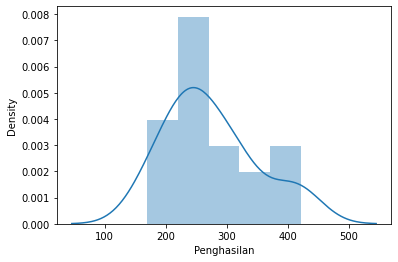

In [ ]:
fig = sns.distplot(df['Penghasilan'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



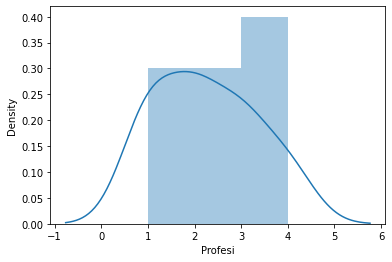

In [ ]:
fig = sns.distplot(df['Profesi'])
plt.show()

In [ ]:
path = '/content/drive/MyDrive/CSV/dataset naive_bayes/dataset_nb1_motor.csv'
df_dup = pd.read_csv(path)

In [ ]:
df_dup

,No,Nama_Konsumen,Kecamatan,Desa,Pendidikan,Profesi,Usia,Penghasilan,Jenis_Kelamin,Pembelian
0,1,Ani,Karangpawitan,Mangunreja,SMA,Karyawan,25,178,Perempuan,Cash
1,2,Andi,Garut Kota,Sukaregang,SMA,Buruh,40,190,Laki-Laki,Kredit
2,3,Ucup,Tarogong,Rancabango,S1,Guru,34,244,Laki-Laki,Kredit
3,4,Yusuf,Bayongbong,Cisalak,S1,Pekerja,31,310,Laki-Laki,Cash
4,5,Elis,Cikajang,Sasak,SMA,Buruh,44,240,Perempuan,Cash
5,6,Ika,Cisurupan,Sariayu,SMA,Karyawan,31,260,Perempuan,Cash
6,7,Bambang,Karangpawitan,Citimun,D3,Pekerja,29,290,Laki-Laki,Kredit
7,8,Mila,Wanaraja,Nangkokod,D3,Buruh,26,311,Perempuan,Kredit
8,9,Sari,Wanaraja,Nangkokod,S1,Guru,30,323,Perempuan,Kredit
9,10,Tari,Garut Kota,Sukaregang,SMA,Pekerja,26,242,Perempuan,Cash


In [ ]:
dataframe = [df_dup, df]
result = pd.concat(dataframe,axis=1)

In [ ]:
result = result.drop(["No","Desa","Pendidikan","Usia"],axis=1)

In [ ]:
result

,Nama_Konsumen,Kecamatan,Profesi,Penghasilan,Jenis_Kelamin,Pembelian,Nama_Konsumen,Kecamatan,Profesi,Penghasilan,Jenis_Kelamin,Pembelian
0,Ani,Karangpawitan,Karyawan,178,Perempuan,Cash,0,1,2,178,2,1
1,Andi,Garut Kota,Buruh,190,Laki-Laki,Kredit,1,2,4,190,1,2
2,Ucup,Tarogong,Guru,244,Laki-Laki,Kredit,2,3,1,244,1,2
3,Yusuf,Bayongbong,Pekerja,310,Laki-Laki,Cash,3,4,3,310,1,1
4,Elis,Cikajang,Buruh,240,Perempuan,Cash,4,5,4,240,2,1
5,Ika,Cisurupan,Karyawan,260,Perempuan,Cash,5,6,2,260,2,1
6,Bambang,Karangpawitan,Pekerja,290,Laki-Laki,Kredit,6,1,3,290,1,2
7,Mila,Wanaraja,Buruh,311,Perempuan,Kredit,7,8,4,311,2,2
8,Sari,Wanaraja,Guru,323,Perempuan,Kredit,8,8,1,323,2,2
9,Tari,Garut Kota,Pekerja,242,Perempuan,Cash,9,2,3,242,2,1


**Klasifikasi Naive Bayes**

In [ ]:
import sklearn
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
X = df.drop(["Pembelian"],axis=1)
print(X)

    Nama_Konsumen Kecamatan Profesi  Penghasilan Jenis_Kelamin
0               0         1       2          178             2
1               1         2       4          190             1
2               2         3       1          244             1
3               3         4       3          310             1
4               4         5       4          240             2
5               5         6       2          260             2
6               6         1       3          290             1
7               7         8       4          311             2
8               8         8       1          323             2
9               9         2       3          242             2
10             10         6       2          255             1
11             11         5       2          234             1
12             12         5       1          414             1
13             13         4       1          422             1
14             14         3       1          401       

In [ ]:
y = df["Pembelian"]
print(y)

0     1
1     2
2     2
3     1
4     1
5     1
6     2
7     2
8     2
9     1
10    2
11    1
12    2
13    2
14    2
15    2
16    2
17    1
18    2
19    2
Name: Pembelian, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [ ]:
X_train.head()

,Nama_Konsumen,Kecamatan,Profesi,Penghasilan,Jenis_Kelamin
5,5,6,2,260,2
14,14,3,1,401,2
9,9,2,3,242,2
7,7,8,4,311,2
16,16,7,2,169,1


In [ ]:
nbtrain = model.fit(X_train, y_train)
nbtrain.class_count_

array([5., 5.])

In [ ]:
#prediksi hasil
y_pred = nbtrain.predict(X_test)
y_pred

array(['2', '1', '2', '2', '1', '2', '1', '2', '1', '1'], dtype='<U1')

In [ ]:
probability = nbtrain.predict_proba(X_test) #hasil probabilitas
probability.shape

(10, 2)

In [ ]:
probability #Nilai Hasil Klasifikasi

array([[2.88143935e-03, 9.97118561e-01],
       [9.88333886e-01, 1.16661145e-02],
       [1.44465262e-01, 8.55534738e-01],
       [9.33215668e-03, 9.90667843e-01],
       [6.36857600e-01, 3.63142400e-01],
       [5.82223916e-02, 9.41777608e-01],
       [9.67448806e-01, 3.25511944e-02],
       [8.68487579e-06, 9.99991315e-01],
       [7.89324444e-01, 2.10675556e-01],
       [9.83548987e-01, 1.64510126e-02]])